# WGU D208 TASK 1 REV 7 - MATTINSON

<div class='impact' data-hdr="Abstract">
    This paper provides the results of a multiple regression analysis conducted on a customer dataset in partial fulfillment of WGU’s D208 Predictive Analysis class requirements. The dataset represents 10,000 rows of customer data for a typical services company. There are fifty (50) attributes for each customer. The provided dataset was mostly clean and ready to use, however, some few additional data cleaning steps were completed prior to running the predictive analysis. The predictive analysis includes both an initial model using all the predictor variables and a final model using a reduced set of predictor variables. The final model includes both numerical and categorical predictor variables. P-values and multi-collinearity were used to select the features used in the final model. The principal research question “how to predict customer monthly charge with high confidence using as few predictor variables as possible” was determined (R-squared = 94.6%) using fifteen (15) of the original attributes. The analysis was conducted in a Python environment using a Jupyter notebook. The Jupyter notebook includes both code and discussion of the analysis. Key words: Churn. Regression. Linear Regression. Multiple Regression. Primary data set: clean_churn.csv, the initial set has 10,000 records with 50 attributes.
</div>

In [51]:
# Styling notebook
from IPython.core.display import HTML
HTML(open("./styles/d208.css", "r").read())

<div class="part">
    Research Question
</div>

<h2 data-nbr="A1">
    Research Question
</h2>

<div class="impact" data-hdr="Primary Research Question">
       A typical services company’s revenue is maximized based on the total number of customers and how much each of those customers pay for those services. If the company charges too much, then the customer may stop the service, this is known as churn. If the company charges too little, then it will not maximize its revenue. This analysis will attempt to predict a customer’s monthly payment (dependent variable is ‘MonthlyCharge’) using multiple regression with high degree of accuracy (R-squared >= 95%) based on a minimum set of predictor variables. The final set of predictor variables should include both numeric data (e.g., Tenure, Child, and xxx, etc.) and categorical data (e.g., xx, yy, and zz, etc.)
    </div>

<h2 data-nbr="A2">
    Objectives & Goals
</h2>

Accomplish the modeling analysis by completing the following:
<ul class="a">
    <li>Refine initial data set by removing insignificant data (e.g. identification variables, some demographic data, etc.)
    <li>Prepare data by converting categorical data to dummy data.
    <li>Prepare data for modeling by standardizing numeric data.
    <li>Eliminate predictor variables with high p-values.
    <li>Eliminate predictor variables with high degree of multicollinearity.
    <li>Create initial model using all the data.
    <li>Refine model using a reduced set of the data.
</ul>


<h2 data-nbr="B1">
    Assumptions
</h2>

The analysis is based on the following assumptions:
<ul class="a">
    <li><b>Linear Relationship</b>. Linear relationship between dependent and independent variables.
    <li><b>Multivariate Normality</b>. Residuals are normally distributed.
    <li><b>Multicollinearity</b>. The independent or predictor variables are not highly correlated with each other.
</ul>


In [19]:
# constants
COURSE = 'd208'
target = 'MonthlyCharge'

In [20]:
# helper functions
def vdir():
    '''https://stackoverflow.com/questions/21542753/dir-without-built-in-methods'''
    return [x for x in dir() if not x.startswith('__')]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def custom_corr_matrix(data, title):
    plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=data.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(X))
    plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w') 

In [21]:
# print out current imports
#lst = dir()
#[k for k in lst if '_' not in k]

<h2 data-nbr="B2">
    Benefits of Using Python
</h2>

The analysis is completed within the Python/VS Code environment. Within the project, a virtual environment is setup to include the packages and code unique to this assignment:<br>
<ul class="a">
    <li>Python 3.9.7
    <li>VS Code 1.60.0
</ul>

Python has the following benefits:
<ul class="a">
    <li>Ease of use
    <li>Availability of required statistical and modeling packages
    <li>User friendly Jupyter notebook allows segmented code execution and ability to include additional markup with the code.
    <li>Able to use custom .css styles to format html output
</ul>

<h3>
    Python Environment
</h3>

In [22]:
# show python environment
print(sys.version)
print(sys.executable)

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
p:\code_wgu\5\v\scripts\python.exe


The following is a list of all installed packages, used [>pip list] from terminal:<br>
<b>Package           Version</b><br>
======================<br>
backcall          0.2.0<br>
colorama          0.4.4<br>
cycler            0.10.0<br>
debugpy           1.4.3<br>
decorator         5.1.0<br>
entrypoints       0.3<br>
ipykernel         6.4.1<br>
ipython           7.27.0<br>
ipython-genutils  0.2.0<br>
jedi              0.18.0<br>
joblib            1.0.1<br>
jupyter-client    7.0.2<br>
jupyter-core      4.7.1<br>
kiwisolver        1.3.2<br>
matplotlib        3.4.3<br>
matplotlib-inline 0.1.3<br>
nest-asyncio      1.5.1<br>
numpy             1.21.2<br>
pandas            1.3.2<br>
parso             0.8.2<br>
pickleshare       0.7.5<br>
Pillow            8.3.2<br>
pip               21.2.4<br>
prompt-toolkit    3.0.20<br>
Pygments          2.10.0<br>
pyparsing         2.4.7<br>
python-dateutil   2.8.2<br>
pytz              2021.1<br>
pywin32           301<br>
pyzmq             22.2.1<br>
scikit-learn      0.24.2<br>
scipy             1.7.1<br>
seaborn           0.11.2<br>
setuptools        56.0.0<br>
six               1.16.0<br>
sklearn           0.0<br>
threadpoolctl     2.2.0<br>
tornado           6.1<br>
traitlets         5.1.0<br>
wcwidth           0.2.5<br>

<h2 data-nbr="B3">
    Why Logistic Regression
</h2>


Multiple regression is “the most common” tool for regression analysis. “Multiple regress will allow researcher to asses strength of the relationship between dependent and several predictor variables as well as the importance of each predictor to the relationship.” (Petchko, 2018)

<div class="Part" data-nbr="I">Data Preparation</div>

<h2 data-nbr="C1">
    Data Preparation
</h2>

In [18]:
# import standard libraries
import os
import sys
import datetime

# import math libraries
import numpy as np
import pandas as pd 
import scipy.stats as stats

# import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import analysis libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA

# regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import helper libraries
from helpers.strings import *
#from helpers.plots import *

The analysis will include the following data preparation tasks:
<ul class="a">
    <li>Load data from .csv file
    <li>Remove insignificant data
    <li>Create a list of the target data
    <li>Create a new data frame of all predictor variables
    <li>Convert categorical data to dummy numerical variables
    <li>Use traditional statistics to describe numerical data
    <li>Create univariate and bivariate visualizations of the data
</ul>


<h2 data-nbr="C2">
    Summary Statistics
</h2>

The target, dependent variable. For this task, <b>MonthlyCharge</b> is the target variable. It is numeric data. The purpose of this regression model is to find the best set of predictor variables that can be used to predict a customer’s MonthlyCharge to a high degree of accuracy. 

<h3>
    Create Dataframe
</h3>

In [24]:
# create dataframe from csv file
df = pd.read_csv(os.path.join('data','churn_clean.csv'))
print(df.columns.to_series().groupby(df.dtypes).groups)
print(df.shape)

{int64: ['CaseOrder', 'Zip', 'Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], float64: ['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}
(10000, 50)


<h3>
    Drop Data
</h3>

In [25]:
# drop unwanted data
to_drop = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
df.drop(columns = to_drop, inplace = True)
print(to_drop)


['City', 'County', 'Zip', 'Job', 'TimeZone', 'State', 'Churn', 'Lat', 'Lng', 'UID', 'Customer_id', 'Interaction', 'CaseOrder', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Insignificant data to be removed:<br>
<ul class="a">
    <li><b>CaseOrder</b>: A placeholder variable to preserve the original order of the raw data file
    <li><b>Customer_id</b>: Unique customer ID Interaction, UID: Unique IDs related to customer transactions, technical support, and sign ups
    <li><b>City</b>: Customer city of residence as listed on the billing statement
    <li><b>State</b>: Customer state of residence as listed on the billing statement
    <li><b>County</b>: Customer county of residence as listed on the billing statement
    <li><b>Zip</b>: Customer zip c ode of residence as listed on the billing statement
    <li><b>Lat, Lng</b>: GPS coordinates of customer residence as listed on the billing statement
    <li><b>TimeZone</b>: Time zone of customer residence based on customer’s sign up information
    <li><b>Job</b>: Job of the customer (or invoiced person) as reported in sign up information
</ul>

In [26]:
# show column names grouped by dtype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

<h3>
    Prepare Numeric Data
</h3>

In [27]:
# prepare numeric data
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')


<h3>
    Prepare Categorical Data
</h3>

In [28]:
# prepare categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


<h3>
    Describe Categorical Data - Before Conversion
</h3>

Categorical data:<br>
<ul class="a">
    <li><b>Area</b>: Area type (rural, urban, suburban), based on census data
    <li><b>Education</b>: Highest degree earned by customer as reported in sign up information
    <li><b>Employment</b>: Employment status of customer as reported in sign up information
    <li><b>Techie</b>: Whether the customer considers themselves technically inclined (based on customer questionnaire when they signed up for services) (yes, no)
    <li><b>Contract</b>: The contract term of the customer (month to month, one year, two year)
    <li><b>Marital</b>: Marital status of customer as reported in sign up information
    <li><b>Gender</b>: Customer self identification as male, female, or nonbinary
    <li><b>Churn</b>: Whether the customer discontinued service within the last month (yes, no)
    <li><b>Port_modem</b>: Whether the customer h as a portable modem (yes, no)
    <li><b>Tablet</b>: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)
    <li><b>InternetService</b>: Customer’s internet service provider (DSL, fiber optic, None)
    <li><b>Phone</b>: Whether the customer has a phone service (yes, no)
    <li><b>Multiple</b>: Whether the customer has multiple lines (yes, no)
    <li><b>OnlineSecurity</b>: Whether the customer has an online security add on (yes, no)
    <li><b>OnlineBackup</b>: Whether the customer has an online backup add on (yes, no)
    <li><b>DeviceProtection</b>: Whether the customer has device protection add on (yes, no)
    <li><b>TechSupport</b>: Whether the customer has a technical support add on (yes, no)
    <li><b>StreamingTV</b>: Whether the customer has streaming TV (yes, no)
    <li><b>StreamingMovies</b>: Whether the customer has streaming movies (yes, no)
    <li><b>PaperlessBilling</b>: Whether the customer has paperless billing (yes, no)
    <li><b>PaymentMethod</b>: The customer’s payment method (electronic check, mailed check, bank (automatic bank transfer), credit card (automatic))
</ul>

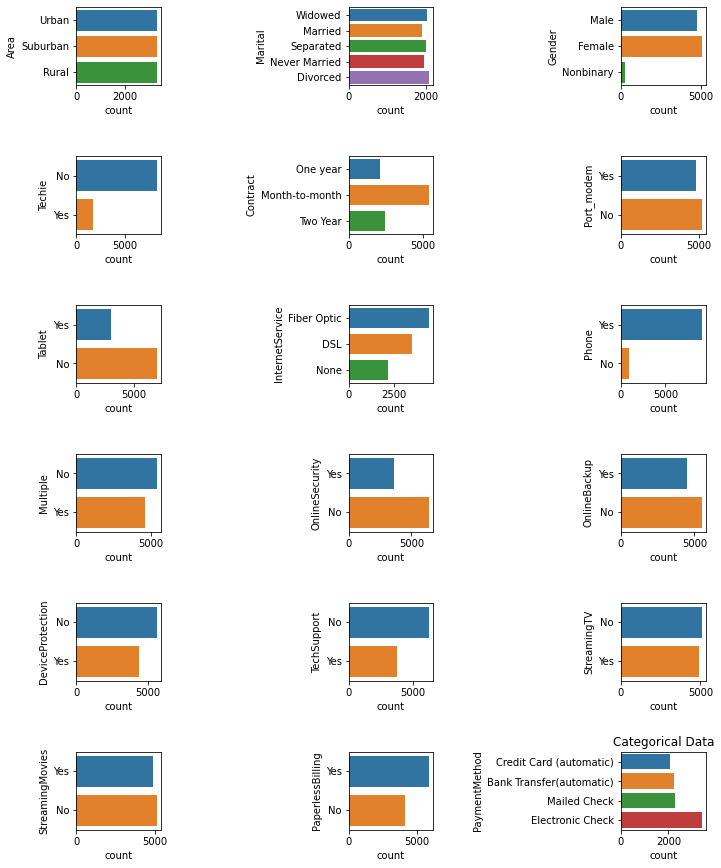

In [29]:
# plot categorical data - before it gets converted
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=df)
    fig.tight_layout(h_pad=4, w_pad=4)

plt.title('Categorical Data')
plt.savefig('output/' + COURSE + '/fig_countplot_categorical.png')
plt.show()

<h3>
    Convert Categorical Data
</h3>

In [30]:
# convert categorical data
contract = df[['MonthlyCharge','Contract']] # keep this for a future calculation
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.select_dtypes(include="uint8").columns)

Index(['Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


<h3>
    List Final Data
</h3>

In [31]:
# show final list of all data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  int64  
 6   Contacts                               10000 non-null  int64  
 7   Yearly_equip_failure                   10000 non-null  int64  
 8   Tenure                                 10000 non-null  float64
 9   MonthlyCharge                          10000 non-null  float64
 10  Bandwidth_GB_Year                      10000 non-null  float64
 11  Are

<h3>
    Describe Target Data
</h3>

Target numerical data:<br>
<ul class="a">
    <li><b>MonthlyCharge</b>. The amount charged to the customer monthly. This value reflects an average per customer. Here is a plot and description of the MonthlyCharge data:<br>
</ul>

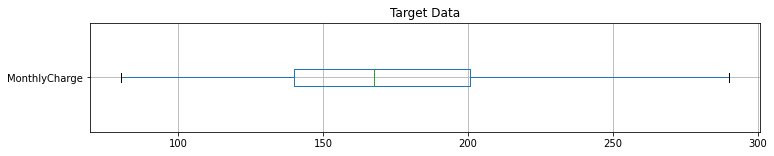

count    10000.000
mean       172.625
std         42.943
min         79.979
25%        139.979
50%        167.485
75%        200.735
max        290.160
Name: MonthlyCharge, dtype: float64


In [32]:
# describe target data
plt.figure(figsize=(12, 2))
ax = df.boxplot([target], vert=False)
plt.title('Target Data')
plt.savefig('output/' + COURSE + '/fig_boxplot_target.png', facecolor='w')
plt.show()
print(df[target].describe().round(3))

<h3>
    Describe Predictor Data
</h3>

Numerical data:<br>
<ul class="a">
    <li><b>Children</b>: Number of children in customer’s household as reported in sign up information
    <li><b>Age</b>: Age of customer as reported in sign up information
    <li><b>Income</b>: Annual income of cu stomer as reported at time of sign up
    <li><b>Outage_sec_perweek</b>: Average number of seconds per week of system outage s in the customer’s neighborhood
    <li><b>Email</b>: Number of emails sent to the customer in the last year (marketing or correspondence)
    <li><b>Contacts</b>: Number of times customer contacted technical support
    <li><b>Population</b>: Population within a mile radius of customer, based on census data
    <li><b>Yearly_equip_failure</b>: The number of times customer’s equipment failed and had to be reset/replaced in the past year
    <li><b>Tenure</b>: Number of months the customer has stayed with the provider
    <li><b>Bandwidth_GB_Year</b>: The average amount of data used, in GB, in a year by the customer
</ul>

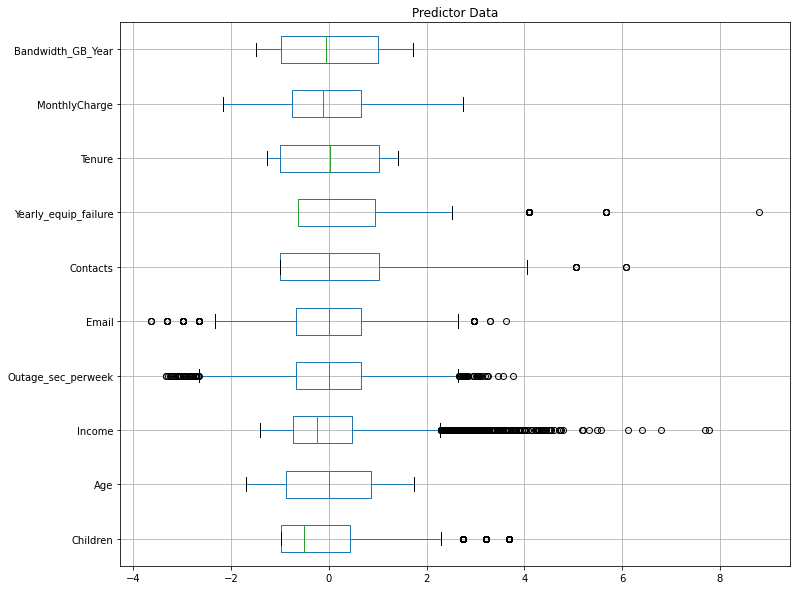

                        count       mean        std      min        25%  \
Children              10000.0      2.088      2.147    0.000      0.000   
Age                   10000.0     53.078     20.699   18.000     35.000   
Income                10000.0  39806.927  28199.917  348.670  19224.718   
Outage_sec_perweek    10000.0     10.002      2.976    0.100      8.018   
Email                 10000.0     12.016      3.026    1.000     10.000   
Contacts              10000.0      0.994      0.988    0.000      0.000   
Yearly_equip_failure  10000.0      0.398      0.636    0.000      0.000   
Tenure                10000.0     34.526     26.443    1.000      7.918   
MonthlyCharge         10000.0    172.625     42.943   79.979    139.979   
Bandwidth_GB_Year     10000.0   3392.342   2185.295  155.507   1236.471   

                            50%        75%         max  
Children                  1.000      3.000      10.000  
Age                      53.000     71.000      89.000  
Inc

In [33]:
# describe and boxplot numeric data
plt.figure(figsize=(12, 10))
pred_cols = df[num_cols].columns[1:]
X = df[pred_cols]
X = ( X - X.mean()) / X.std() # standardized for plot
ax = X.boxplot(vert=False)
plt.title('Predictor Data')
plt.savefig('output/' + COURSE + '/fig_boxplot_numeric.png', facecolor='w')
plt.show()
print(df[pred_cols].describe().round(3).T)


<h2 data-nbr="C3">
    Data Preparation
</h2>

In order to use the categorical data, each categorical variable was converted to dummy data using pd.get_dummies() function. The function converts to new variables using the values of data and then removes the original variable.

<h2 data-nbr="C4">
    Visualize Data
</h2>

<h3>
    Visualize Numeric Features
</h3>

<Figure size 720x1440 with 0 Axes>

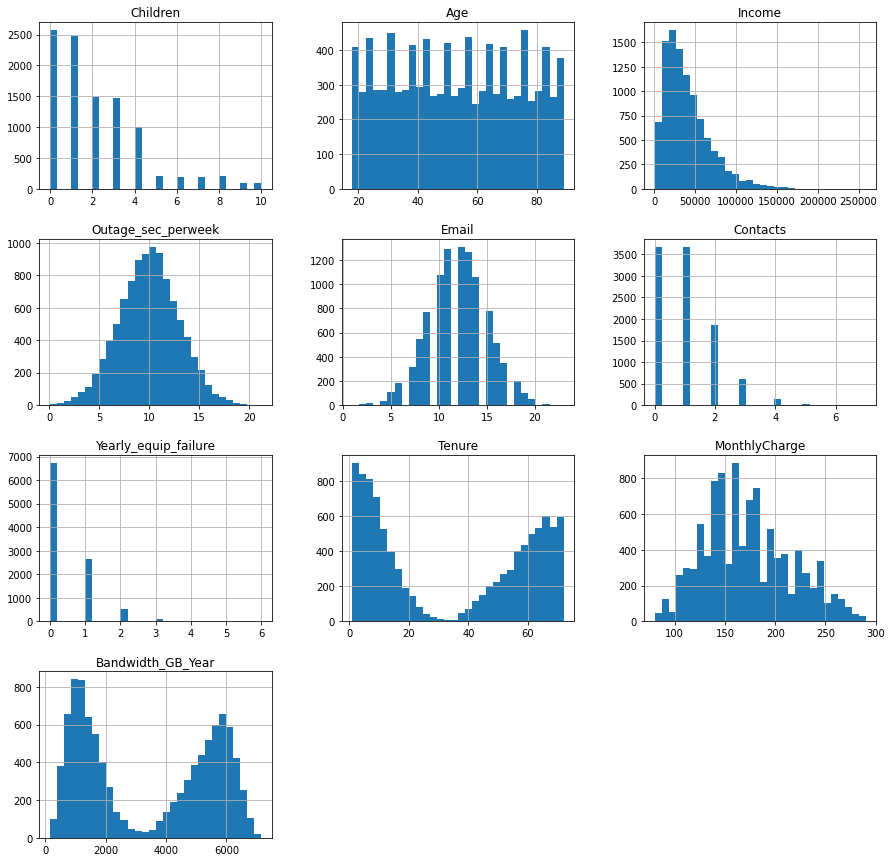

In [34]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[pred_cols].hist(bins = 30, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('output/' + COURSE + '/fig_hist_numeric.png', facecolor='w')
plt.show()

Survey data, not to be used for this analysis:<br>
<ul class="a">
    <li><b>Item1</b>: Timely response
    <li><b>Item2</b>: Timely fixes
    <li><b>Item3</b>: Timely replacements
    <li><b>Item4</b>: Reliability
    <li><b>Item5</b>: Options
    <li><b>Item6</b>: Respectful response
    <li><b>Item7</b>: Courteous exchange
    <li><b>Item8</b>: Evidence of active listening
</ul>

<h3>
    Scatter Plot Selected Features vs. Target
</h3>

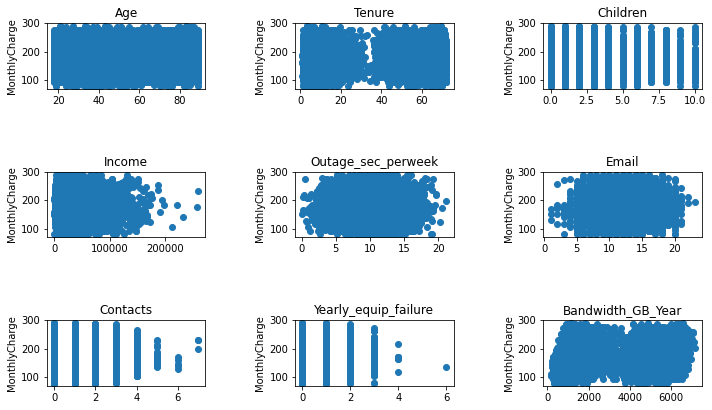

In [35]:
# scatter plot of selected features
fig = plt.figure(figsize=(10, 20))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = df[col]
    y = df[target]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel(target)
    fig.tight_layout(h_pad=5, w_pad=5)
    
plt.savefig('output/' + COURSE + '/fig_scatterplot_selected.png', facecolor='w')


<h3>
    Scatter Plot of Tenure vs. Bandwidth_GB_Year
</h3>

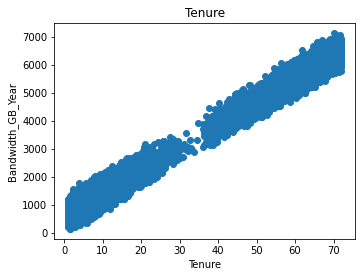

In [36]:
# scatter plot of tenure and bandwidth
fig = plt.figure(figsize=(10, 20))
features = ['Tenure']
target = df['Bandwidth_GB_Year']

for i, col in enumerate(features):
    plt.subplot(5, 2, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Bandwidth_GB_Year')
    fig.tight_layout(h_pad=5, w_pad=5)
    
plt.savefig('output/' + COURSE + '/fig_scatterplot_tenure.png', facecolor='w')


There is a linear relationship between Tenure and Bandwidth_GB_Year indicating multicollinearity. 

<h3>
    Contract data filtered by above ave. MonthlyCharge
</h3>

Mean of MonthlyCharge: $172.62
Contract
Month-to-month    2609
One year          1017
Two Year          1141
Name: MonthlyCharge, dtype: int64


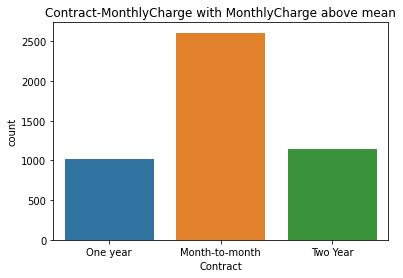

In [37]:
# bar plot contract-monthlycharge 
c = 'Contract'
mean = contract['MonthlyCharge'].mean()
print('Mean of MonthlyCharge: ${:.2f}'.format(mean))
temp_df = contract.query('MonthlyCharge>=172')
sns.countplot(x=c, data=temp_df)
plt.title('Contract-MonthlyCharge with MonthlyCharge above mean')
print(temp_df.groupby("Contract")["MonthlyCharge"].count())
plt.savefig('output/' + COURSE + '/fig_barplot_contracts.png', facecolor='w')
plt.show()

Notice there is a higher number of customers with Month-to-month contracts whos MonthlyCharge is at or above the mean.

<h2 data-nbr="C5">
    Provide Copy of Data
</h2>

In [38]:
# provide copy of data
final_data = 'd208_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))
print(df.columns.to_series().groupby(df.dtypes).groups)

File saved to: d208_final_data.csv
{uint8: ['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'], int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']}


<h2 data-nbr="D1">
    Initial Model
</h2>

<h3>
    Model Summary
</h3>

In [49]:
# initial model
y = df.loc[ : , df.columns == target]
X = df.loc[ : , df.columns != target]
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2()) # using alternate summary layout

ValueError: Lengths must match to compare

Notice high condition number indicating possible multicollinearity between predictor variables. Also, many of the predictor p-values are high, above 0.05.

<h3>
    Correlation Data
</h3>

Tenure                                 Bandwidth_GB_Year                 0.991495
Area_Suburban                          Area_Urban                        0.500711
InternetService_Fiber Optic            InternetService_None              0.461753
PaymentMethod_Electronic Check         PaymentMethod_Mailed Check        0.390989
PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check    0.367992
dtype: float64


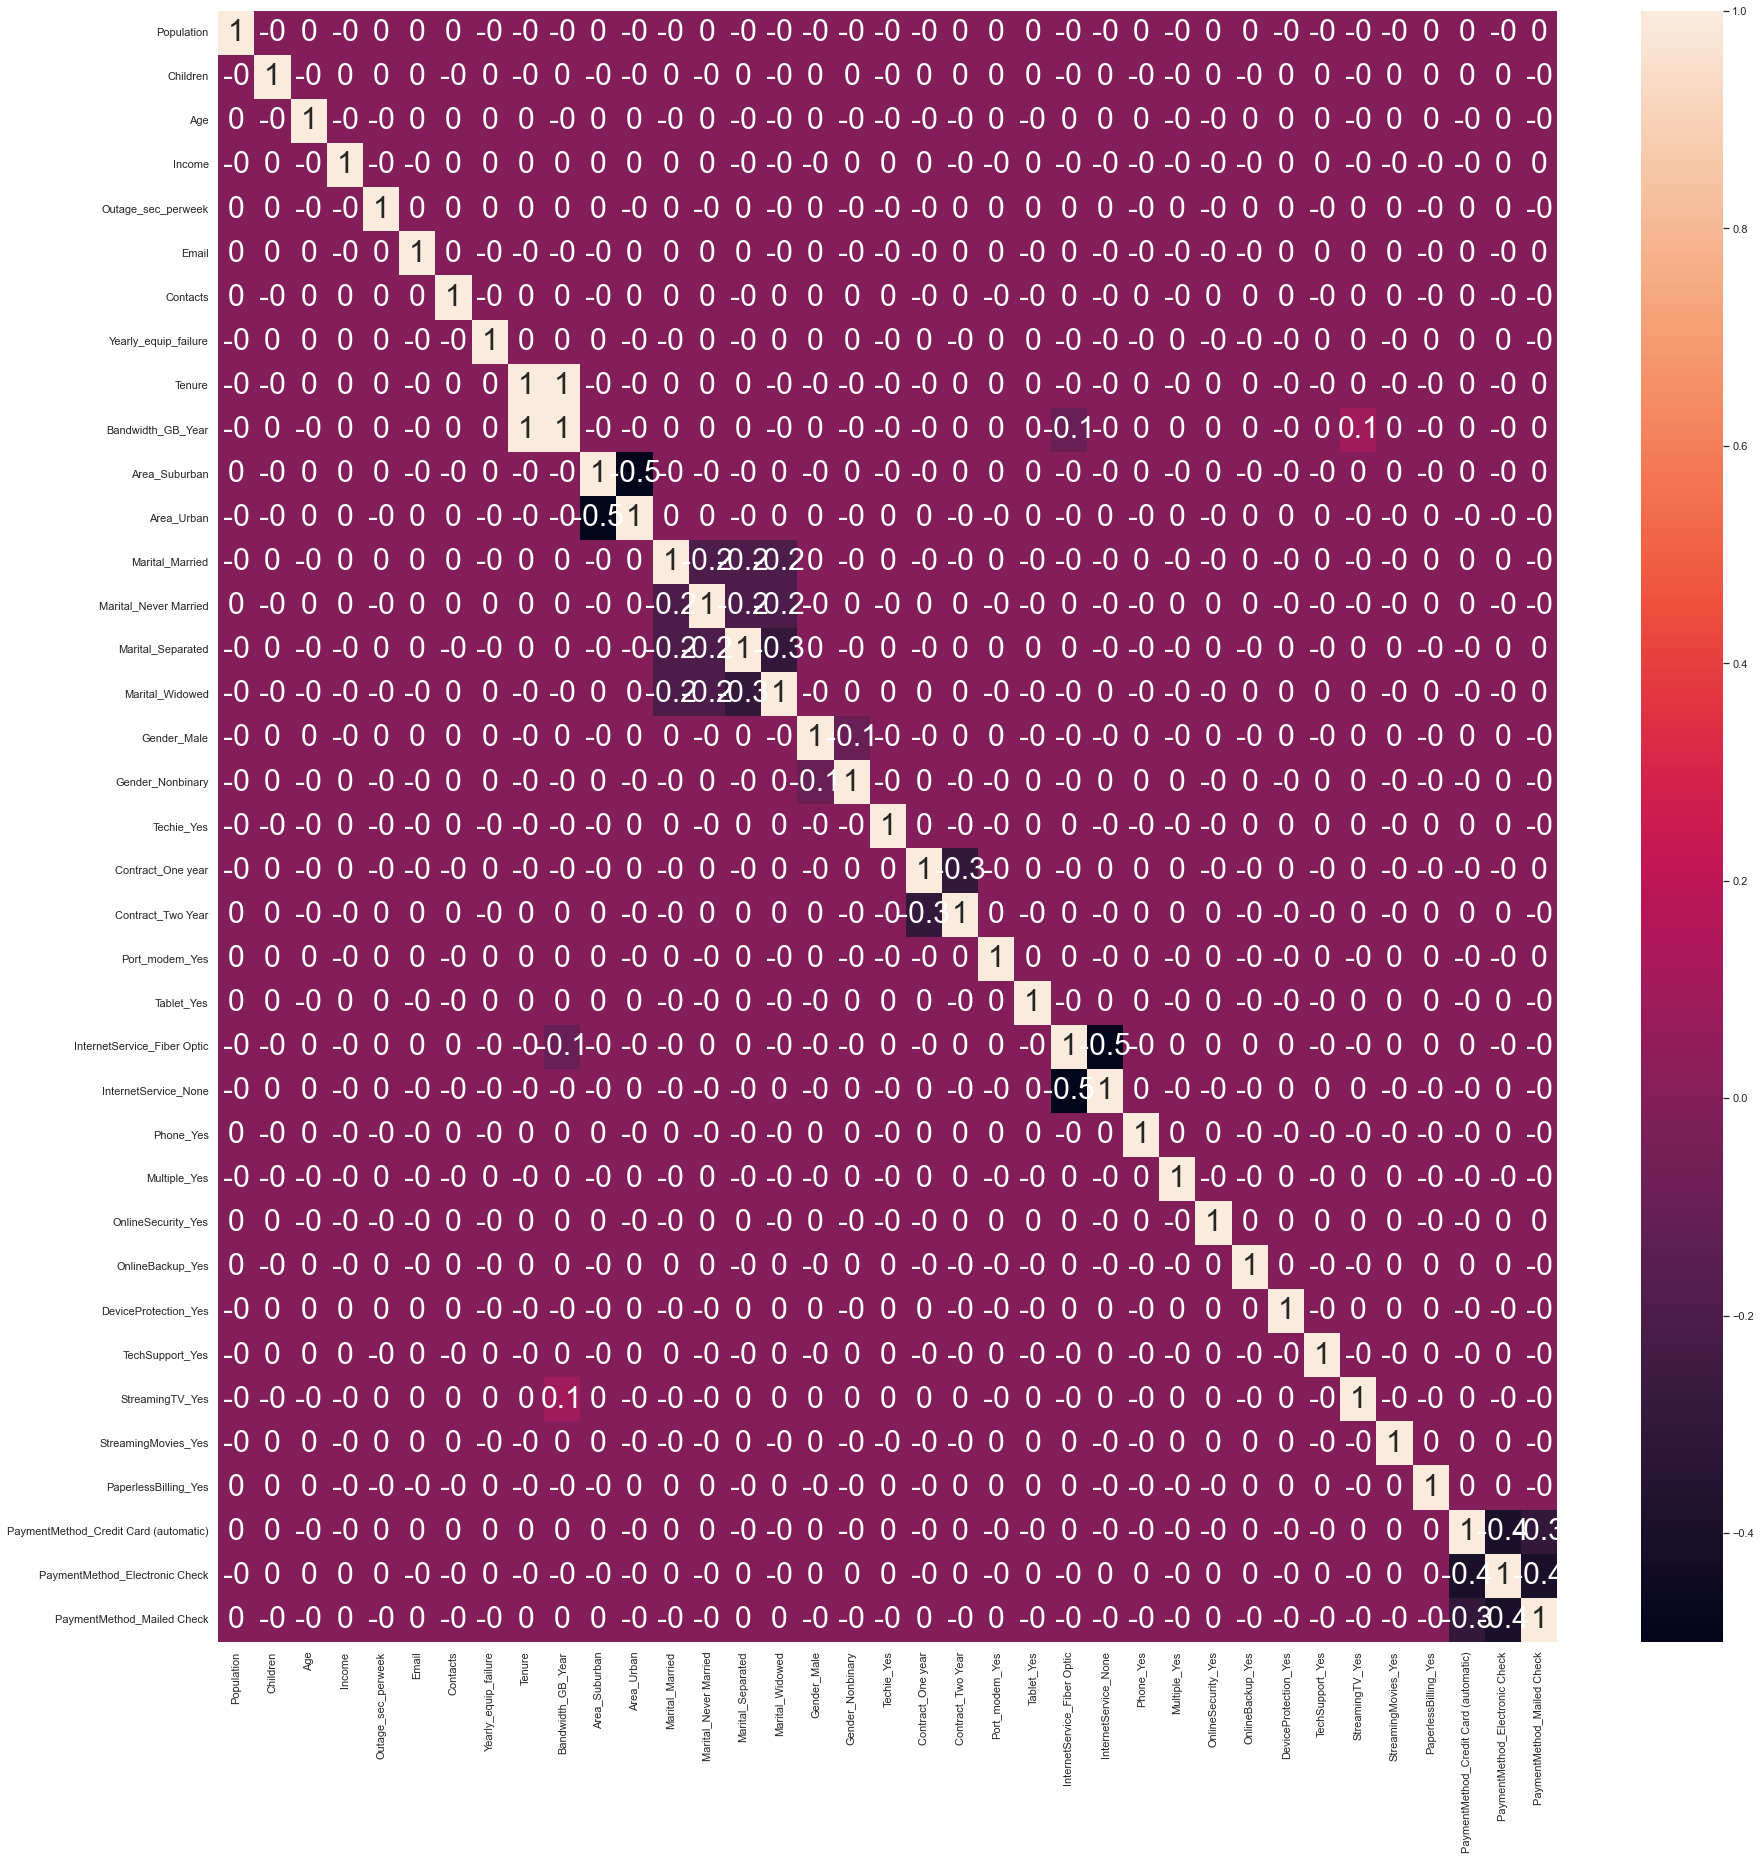

In [40]:
# create correlation matrix
custom_corr_matrix(X,'Model_1')

The top correlation is between Tenure and Bandwidth_GB_Year. Based on this high correlation, remove Bandwidth_GB_Year prior to the next model iteration.

On the high p-values side of the house, I wrote code to loop through the model summary and drop any predictor whose p-value is greater than 0.05. Here is the code:

<h3>
    Refine Model
</h3>

In [41]:
# automatically drop cols if p > 0.05
equation = model_1.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        X.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
X.drop(columns = ['Bandwidth_GB_Year'], inplace = True)
print(X.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'Multiple_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Mailed Check'],
      dtype='object')


p:\code_wgu\5\v\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h3>
    Update Model
</h3>

In [42]:
# updated model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary2()) # using alternate summary layout

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.958     
Dependent Variable:     MonthlyCharge        AIC:                    71881.4578
Date:                   2021-09-21 15:12     BIC:                    72004.0336
No. Observations:       10000                Log-Likelihood:         -35924.   
Df Model:               16                   F-statistic:            1.427e+04 
Df Residuals:           9983                 Prob (F-statistic):     0.00      
R-squared:              0.958                Scale:                  77.368    
-------------------------------------------------------------------------------
                             Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------------
const                        83.8447   0.3893 215.3865 0.0000  83.0816  84.6077
Children                      0.0112   0.0410   0.2729 0.7849  -

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h3>
    Regression Equation
</h3>

In [43]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.958
Estimate [MonthlyCharge] as y = 
   +83.84 x ( const ) 
   +0.01 x ( Children ) 
   +0.00 x ( Age ) 
   -0.00 x ( Tenure ) 
   +0.06 x ( Area_Suburban ) 
   -0.26 x ( Gender_Male ) 
   -0.85 x ( Gender_Nonbinary ) 
   +19.84 x ( InternetService_Fiber Optic ) 
   -12.89 x ( InternetService_None ) 
   +32.60 x ( Multiple_Yes ) 
   +2.67 x ( OnlineSecurity_Yes ) 
   +22.57 x ( OnlineBackup_Yes ) 
   +12.52 x ( DeviceProtection_Yes ) 
   +12.56 x ( TechSupport_Yes ) 
   +42.19 x ( StreamingTV_Yes ) 
   +52.32 x ( StreamingMovies_Yes ) 
   +0.09 x ( PaymentMethod_Mailed Check ) 


<h3>
    Updated Correlation Data
</h3>

InternetService_Fiber Optic  InternetService_None    0.461753
Gender_Male                  Gender_Nonbinary        0.146092
Children                     Age                     0.029732
Gender_Nonbinary             OnlineBackup_Yes        0.029316
Tenure                       DeviceProtection_Yes    0.028114
dtype: float64


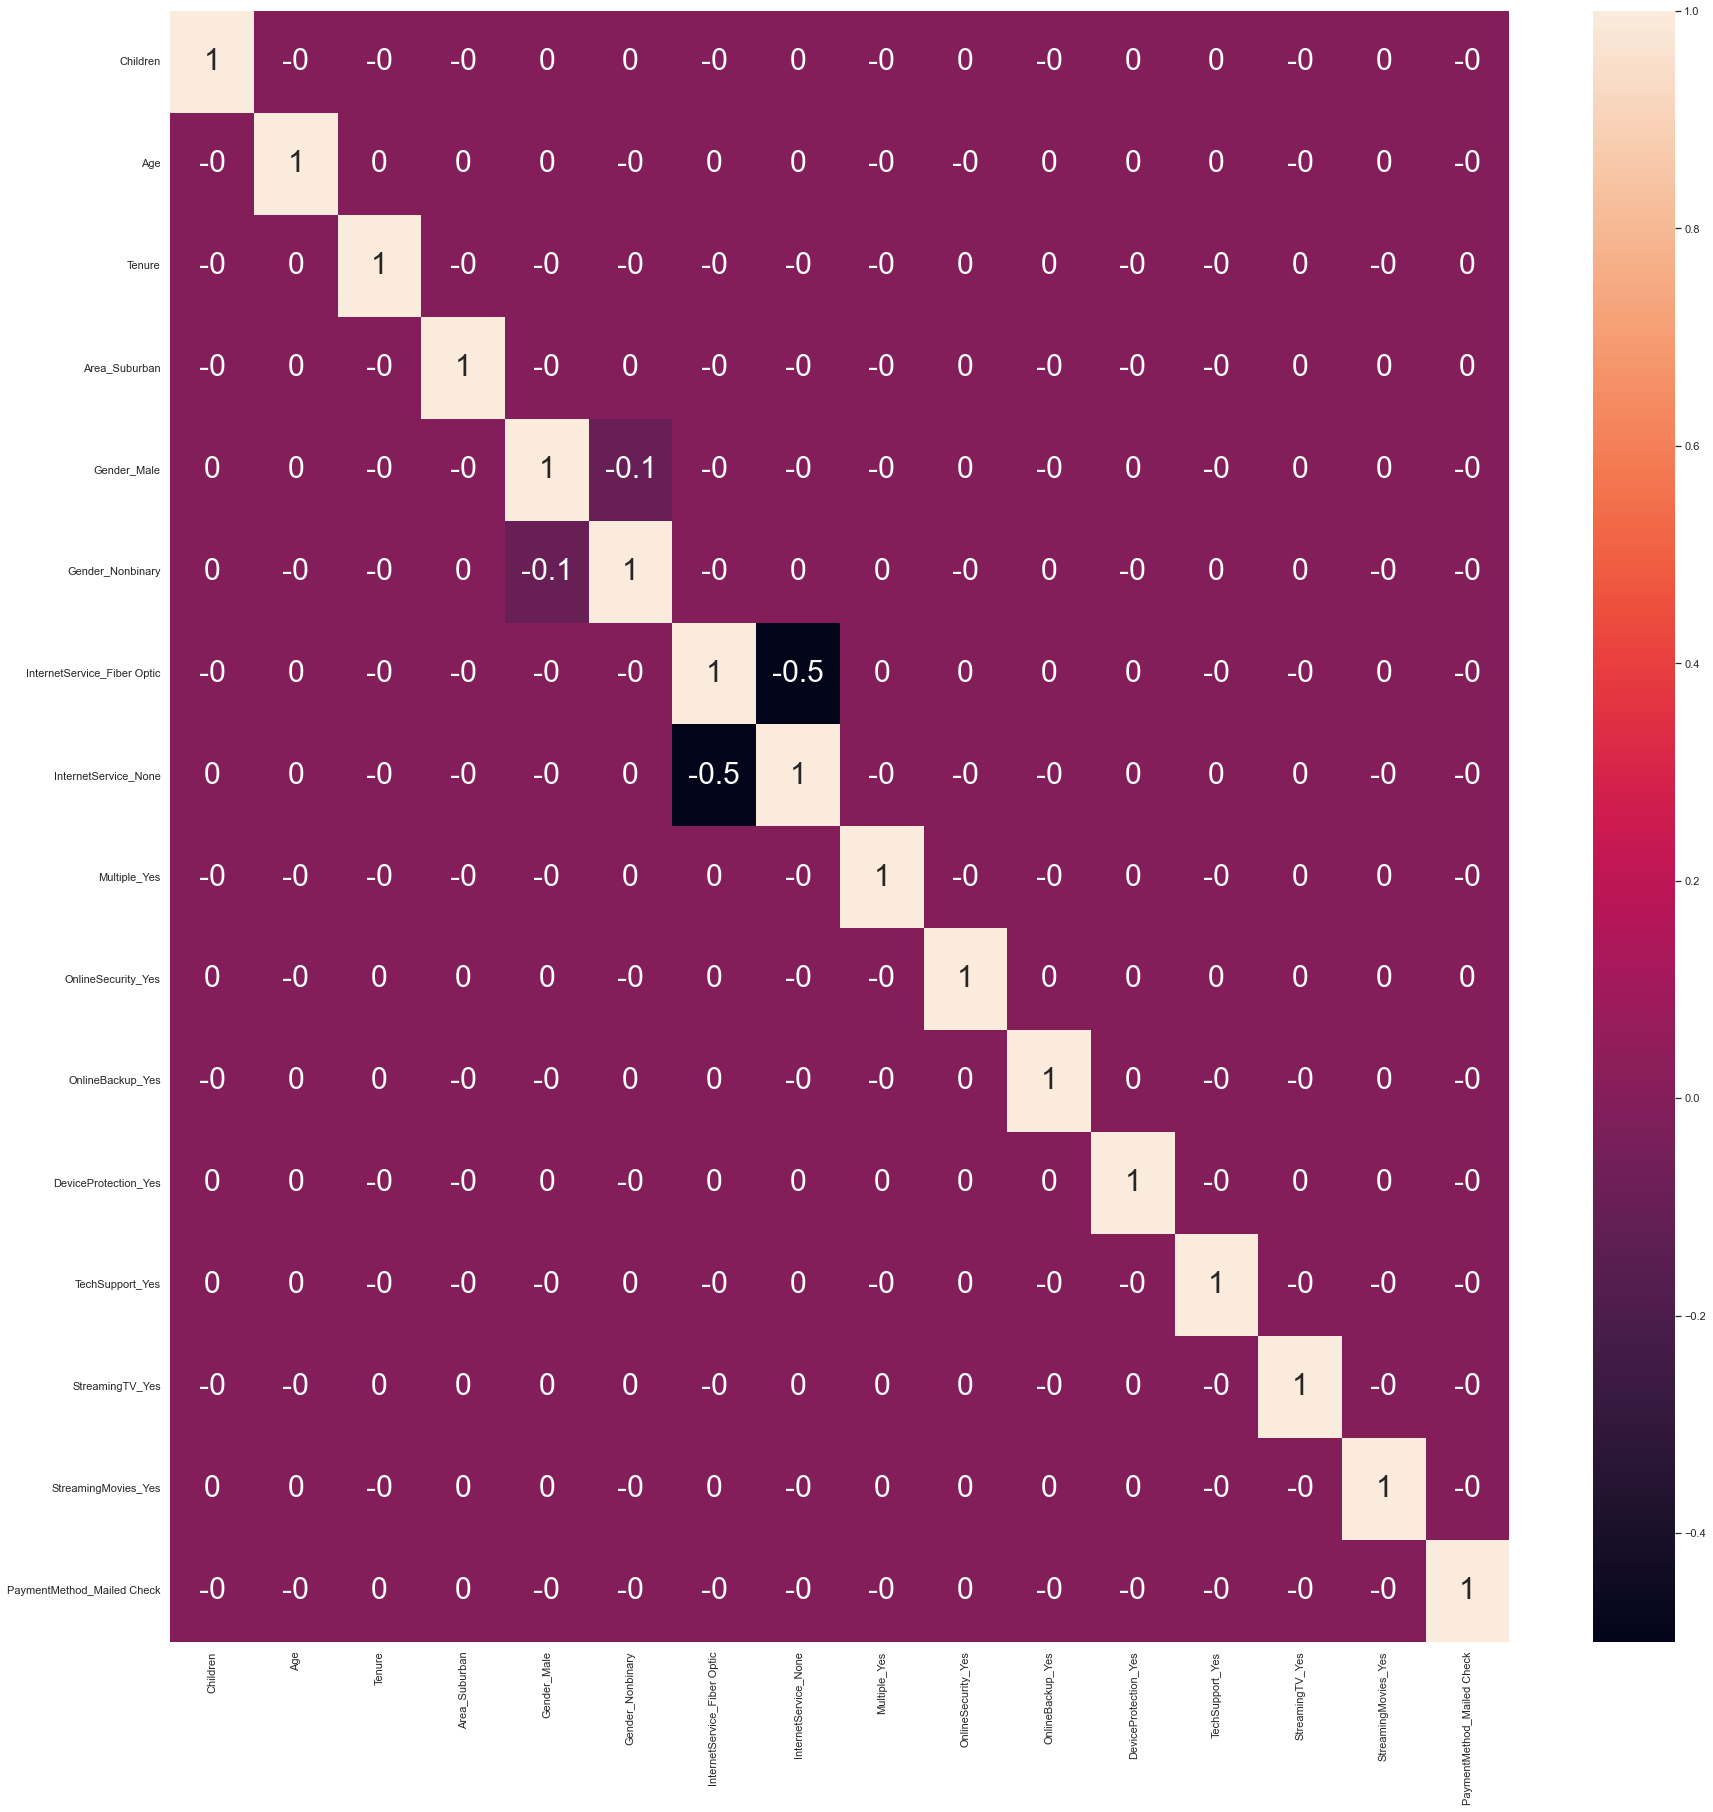

In [44]:
# create correlation matrix
custom_corr_matrix(X,'Model_2')

<h2 data-nbr="D3">
    Final Model
</h2>

This analysis created three (3) models all together. The initial model shown above, then a second model. The second model also had predictor variables with high p-values. But, for the final model, the numerical data was left in the model. The for-loop was used to remove only the column(s) with high multicollinearity.

<h3>
    Last Reduction
</h3>

In [45]:
# opted to leave the remaining numerical values 
# even with their high p-values

# drop columns with high multicollinearity
X.drop(columns = ['InternetService_None'], inplace = True)
print(X.columns)

Index(['Children', 'Age', 'Tenure', 'Area_Suburban', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_Fiber Optic', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Mailed Check'],
      dtype='object')


p:\code_wgu\5\v\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h3>
    Final Model
</h3>

In [46]:
# final model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary2()) # using alternate summary layout

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.946     
Dependent Variable:    MonthlyCharge       AIC:                   74372.4453
Date:                  2021-09-21 15:12    BIC:                   74487.8107
No. Observations:      10000               Log-Likelihood:        -37170.   
Df Model:              15                  F-statistic:           1.172e+04 
Df Residuals:          9984                Prob (F-statistic):    0.00      
R-squared:             0.946               Scale:                 99.263    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                       78.7503   0.4274 184.2704 0.0000 77.9126 79.5880
Children                    -0.0025   0.0464  -0.0548 0.9563 -0.0936  0.0885
Age                   

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2 data-nbr="F1">
    Discuss Results
</h2>

The final model is complete. Compare R-squared values for all three models. Notice the condition number descreased in each subsequent model. Although, Childre, Age and Tenure (the original numeric data) indicated high p-values in the final model, I elected to leave those in because the task required both numeric and categorical data in the final model. I wrote code to extract the variables and coefficents from the summary and generates an equation for the regression line.

<h3>
    Final Regression Equation
</h3>

In [47]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   +78.75 x ( const ) 
   -0.00 x ( Children ) 
   +0.00 x ( Age ) 
   +0.00 x ( Tenure ) 
   +0.09 x ( Area_Suburban ) 
   -0.19 x ( Gender_Male ) 
   -0.90 x ( Gender_Nonbinary ) 
   +24.74 x ( InternetService_Fiber Optic ) 
   +32.80 x ( Multiple_Yes ) 
   +2.80 x ( OnlineSecurity_Yes ) 
   +22.58 x ( OnlineBackup_Yes ) 
   +12.46 x ( DeviceProtection_Yes ) 
   +12.64 x ( TechSupport_Yes ) 
   +42.18 x ( StreamingTV_Yes ) 
   +52.34 x ( StreamingMovies_Yes ) 
   +0.12 x ( PaymentMethod_Mailed Check ) 


The final model using fifteen (15) predictor variables with a 94.6% R-squared.
<b>Interpretation of coefficients of significant variables</b>… Based on the regression summary, the primary component to the monthly charge prediction is in the categorical data. The numerical data of Age, Children, and Tenure, for example, only contribute minimally to the predicted value.
<b>Limitations of the data</b>…The provided data is static and should be refreshed periodically.

<h2 data-nbr="F2">
    Recommendations
</h2>

Recommend using the model to (1) predict economic value for a given customer and (2) consider offering discounts or rebate to customers who are paying more than an average or predicted monthly charge.

<h2 data-nbr="G">
    Video
</h2>

Video created and the .mp4 file is attached to submission.

<h2 data-nbr="H">
    References
</h2>

Using reference from P:\workspace-wgu\Wgu Sources_210804.xml
Agarwal, A. (2021, September). Linear Regression on Boston Housing Dataset. Retrieved from Towards Data Science: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
Bari, A., Chaouchi, M., & Jung, T. (2021, August). How to List Business Objectives for Predictive Analytics. Retrieved from dummies.com: https://www.dummies.com/programming/big-data/data-science/how-to-list-business-objectives-for-predictive-analytics/
blog.hubspot.com. (2021). Customer Lifetime Value (CLV). Retrieved from blog.hubspot.com: https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value
Brown, J. (2018, June 15). A Gentle Introduction to the Chi-Squared Test for Machine Learning. Retrieved from Machine Learning Mastery.com: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists. O’Reilly Media Inc.
Chi Squared Table. (2021, July 31). Retrieved from Statistics How To: https://www.statisticshowto.com/tables/chi-squared-table-right-tail/
Contingency Tables. (2021, July 31). Retrieved from statsmodels.org: https://www.statsmodels.org/stable/contingency_tables.html
Grace-Martin, K. (2021, August). 7 Practical Guidelines for Accurate Statistical Model Building. Retrieved from Analysis Factor: https://www.theanalysisfactor.com/7-guidelines-model-building/
Grace-Martin, K. (2021, August). Eight Ways to Detect Multicollinearity. Retrieved from Analysis Factor: https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/
Griffiths, D. (2009). Head First Statistics. O’Reilly Media Inc.
Hamel, G. (2021, July 31). Python for Data 25: Chi-Squared Tests. Retrieved from kaggle.com: https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
Larose, C. D., & Larose, D. T. (2019). Data Science Using Python and R. Wiley.
Mammadaliyev, F. (2021, September). Extracting regression details from StatsModel using loop. Retrieved from YouTube: https://www.youtube.com/watch?v=u6ZDnSuoRH0&ab_channel=FaridMammadaliyev
Mathematics Symbols. (2021, August). Retrieved from math.meta.stackexchange.com: https://math.meta.stackexchange.com/questions/21841/how-to-type-greater-than-orequal-to-symbols?noredirect=1
Matplotlib: Visualization with Python. (2021, August). Retrieved from matplotlib.org: https://matplotlib.org
McKinney, W. (2021, August). pandas: powerful Python data analysis toolkit, Release 1.3.1. Retrieved from pandas.pydata.org: https://pandas.pydata.org/docs/pandas.pdf
Numpy.org. (2021, August). Retrieved from numpy.org: numpy.org
qualtrics.com. (2021, August). Customer Lifetime Value (CLV). Retrieved from qualtrics.com: https://www.qualtrics.com/experience-management/customer/customer-lifetime-value/
Rekha, M. (2021, August). Correlation and Collinearity - How they can make or break model. Retrieved from blog.clairvoyantsoft.com: https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a
Sullivan, L. (2021, July 31). Hypothesis Testing - Chi Squared Test. Retrieved from sphweb.bumc.be.edu: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ChiSquare/BS704_HypothesisTesting-ChiSquare_print.html

